<a href="https://colab.research.google.com/github/JSJeong-me/CNN-Cats-Dogs/blob/main/data_set_builder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip training_data.zip

In [ ]:
!ls -l

total 66636
drwx------ 5 root root     4096 Jan 21 06:04 drive
drwxr-xr-x 1 root root     4096 Jan 15 17:28 sample_data
drwxr-xr-x 2 root root    20480 Jan 21 06:20 test_data
drwxr-xr-x 2 root root    69632 Jan 21 06:20 training_data
-rw-r--r-- 1 root root 68110008 Jan 21 06:12 training_data.zip
drwxr-xr-x 2 root root    20480 Jan 21 06:20 validation_data


In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [ ]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (2000, 150, 150, 3) 	Validation dataset shape: (500, 150, 150, 3)


In [ ]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

(150, 150, 3)


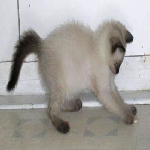

In [ ]:
print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [ ]:
batch_size = 50
num_classes = 2
epochs = 100
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat'] [0 0 0 0 1 1 1 1 1 0]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding="same",  activation='relu', input_shape=input_shape),)
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(512, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(512, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(512, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 37, 37, 256)      

In [ ]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/100
40/40 [==============================] - 17s 388ms/step - loss: 11681.0317 - accuracy: 0.4914 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/100
40/40 [==============================] - 16s 390ms/step - loss: 0.6939 - accuracy: 0.4957 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
40/40 [==============================] - 16s 393ms/step - loss: 0.6945 - accuracy: 0.4959 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/100
40/40 [==============================] - 15s 387ms/step - loss: 0.6935 - accuracy: 0.4930 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/100
40/40 [==============================] - 15s 384ms/step - loss: 0.6938 - accuracy: 0.4831 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/100
40/40 [==============================] - 15s 384ms/step - loss: 0.6936 - accuracy: 0.4912 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/100
40/40 [==============================] - 15s 386ms/step - loss: 1.4301 - accuracy: 0.5013 - val_loss: 0.6932 - val_accur

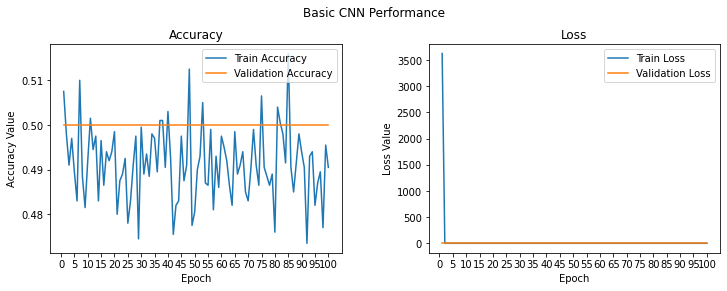

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('cola-01-21.h5')